In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
database =connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [4]:
cur = database.cursor()

In [5]:
query = 'SELECT * FROM home_loan_new_DTI1;'

cur.execute(query)

792

In [6]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_4252\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [7]:
# Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0      811  Female   19   < 20 years        Married                 3   
1     1232    Male   62  >= 60 years         Single                 2   
2      889    Male   22  20-30 years        Married                 0   
3      192  Female   20  20-30 years         Single                 1   
4     1185    Male   60  >= 60 years        Married                 0   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor        Salaried                 Urban             Owned   
2            Master      Government                 Urban            Rented   
3            Master      Government                 Rural             Owned   
4             Ph.D.   Self-employed                 Urban      With Parents   

   ...  Loan_bins loan_term_yrs    term_bins  loan_

In [10]:
# Create a contingency table for Credit History vs Approval Status
credit_history_vs_approval = pd.crosstab(df['credit_history'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Credit History vs Approval Status")
print(credit_history_vs_approval)


Contingency Table: Credit History vs Approval Status
approval_status  Approved  Rejected
credit_history                     
Excellent              51        22
Fair                   25        12
Good                  190       108
NA/NH                  12         1
Poor                   91        48
Very Good             137        55


In [12]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(credit_history_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=credit_history_vs_approval.index, columns=credit_history_vs_approval.columns))
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Credit History and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Credit History and Approval Status.")




Chi-Square Test Results:
Chi-Square Statistic: 7.256361819605913
P-Value: 0.20226181070693128
Degrees of Freedom: 5

Expected Frequencies Table:
approval_status    Approved   Rejected
credit_history                        
Excellent         49.119681  23.880319
Fair              24.896277  12.103723
Good             200.515957  97.484043
NA/NH              8.747340   4.252660
Poor              93.529255  45.470745
Very Good        129.191489  62.808511

Fail to reject the null hypothesis: There is no significant association between Credit History and Approval Status.


Contingency Table: Employment Type vs Approval Status
approval_status  Approved  Rejected
employment_type                    
Government             80        38
Salaried              270       126
Self-employed         156        70
Unemployed              0        12

Chi-Square Test Results:
Chi-Square Statistic: 25.151420980785705
P-Value: 1.435483118522397e-05
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status    Approved    Rejected
employment_type                        
Government        79.398936   38.601064
Salaried         266.457447  129.542553
Self-employed    152.069149   73.930851
Unemployed         8.074468    3.925532

Reject the null hypothesis: There is a significant association between Employment Type and Approval Status.


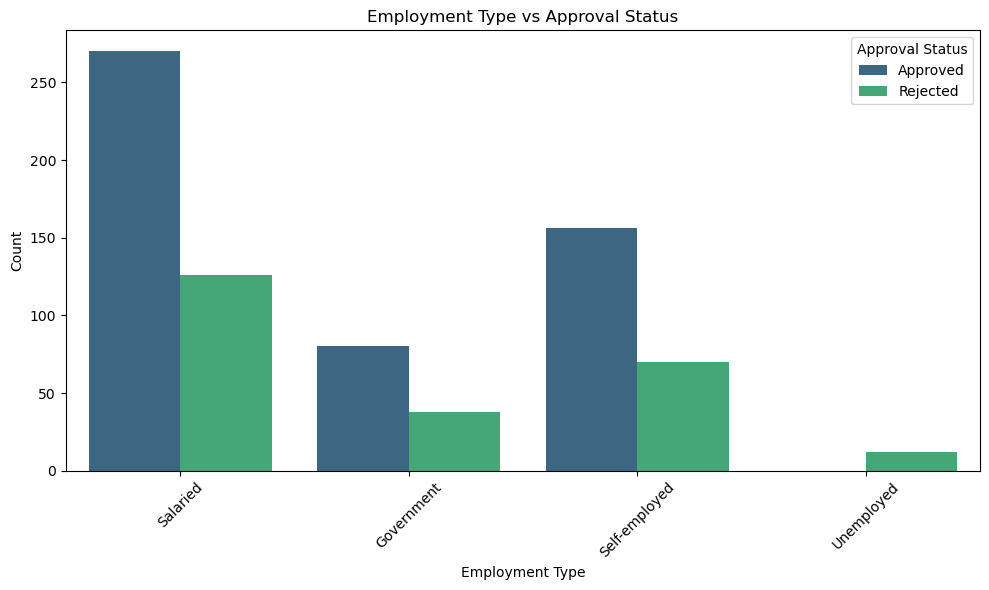

In [17]:
# Step 1: Prepare the Contingency Table
employment_vs_approval = pd.crosstab(df['employment_type'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Employment Type vs Approval Status")
print(employment_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(employment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=employment_vs_approval.index, columns=employment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Employment Type and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Employment Type and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', hue='approval_status', palette='viridis')
plt.title('Employment Type vs Approval Status')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Since the P-Value (1.435e-05) is much smaller than 0.05, we reject the null hypothesis. This means that there is a significant association between Employment Type and Approval Status. In other words, the employment type of an applicant plays a significant role in whether their loan application is approved or rejected.

Key Insights
Government and Salaried employees have higher approval rates compared to the Self-employed and Unemployed groups.
Unemployed applicants had zero approvals and 12 rejections. This suggests that unemployment status may lead to a higher likelihood of rejection.
There is a notable difference in the observed vs. expected frequencies for all categories, further indicating that Employment Type significantly impacts loan approval.

In [19]:
# Step 1: Prepare the Contingency Table
income_vs_approval = pd.crosstab(df['income_buckets'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(income_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(income_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=income_vs_approval.index, columns=income_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between income and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between income and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_buckets', hue='approval_status', palette='viridis')
plt.title('Income vs Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
income_buckets                     
0-5 Lakhs              48        34
10-15 Lakhs           153        69
15-20 Lakhs           166        78
5-10 Lakhs            139        65

Chi-Square Test Results:
Chi-Square Statistic: 3.24972268717069
P-Value: 0.3547018345858659
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status    Approved   Rejected
income_buckets                        
0-5 Lakhs         55.175532  26.824468
10-15 Lakhs      149.377660  72.622340
15-20 Lakhs      164.180851  79.819149
5-10 Lakhs       137.265957  66.734043

Fail to reject the null hypothesis: There is no significant association between income and Approval Status.


In [25]:
# Step 1: Prepare the Contingency Table
DTI_vs_approval = pd.crosstab(df['DTI_Value'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(DTI_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=DTI_vs_approval.index, columns=DTI_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between DTI and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between DTI and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DTI_Value', hue='approval_status', palette='viridis')
plt.title('DTI vs Approval Status')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 0.12224483559057252
P-Value: 0.7266124233803144
Degrees of Freedom: 1

Expected Frequencies Table:
approval_status    Approved    Rejected
DTI_Value                              
DTI<=42%         393.630319  191.369681
DTI>42%          112.369681   54.630319

Fail to reject the null hypothesis: There is no significant association between DTI and Approval Status.


Since the P-Value (0.727) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means that there is no evidence of a significant association between DTI Value and Approval Status.

Key Insights
The Chi-Square Statistic is quite low (0.122), which suggests that there isn't much difference between the observed and expected frequencies.
The high P-Value implies that DTI value is not a significant factor affecting loan approval. The approval rate for DTI <= 42% and DTI > 42% seems consistent, meaning that the DTI ratio alone does not explain the difference between approvals and rejections.


Contingency Table: savings vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 0.9763646325014887
P-Value: 0.9133584551723192
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status    Approved   Rejected
Savings_bins                          
 0-1L             98.239362  47.760638
1L-2L            113.042553  54.957447
2L-3L             97.566489  47.433511
3L-4L             96.220745  46.779255
4L-5L            100.930851  49.069149

Fail to reject the null hypothesis: There is no significant association between savings and Approval Status.


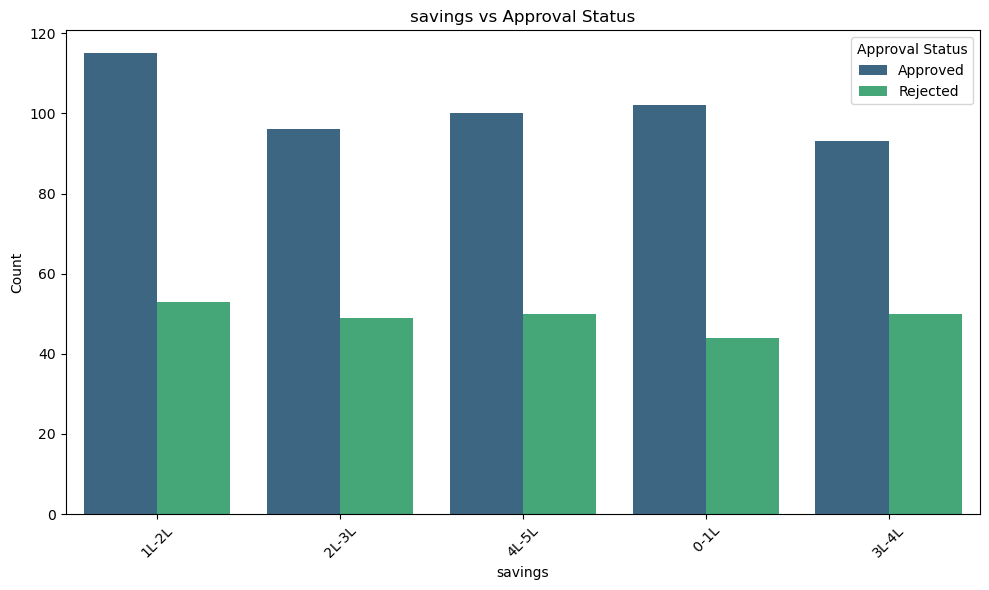

In [22]:
# Step 1: Prepare the Contingency Table
savings_vs_approval = pd.crosstab(df['Savings_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: savings vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(savings_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=savings_vs_approval.index, columns=savings_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between savings and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between savings and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Savings_bins', hue='approval_status', palette='viridis')
plt.title('savings vs Approval Status')
plt.xlabel('savings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 9.264674401459624
P-Value: 0.05481383182136742
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status    Approved   Rejected
investment_bins                       
 0-2L             94.875000  46.125000
2L-4L            106.986702  52.013298
4L-6L            100.930851  49.069149
6L-8L            123.135638  59.864362
8L-10L            80.071809  38.928191

Fail to reject the null hypothesis: There is no significant association between investment and Approval Status.


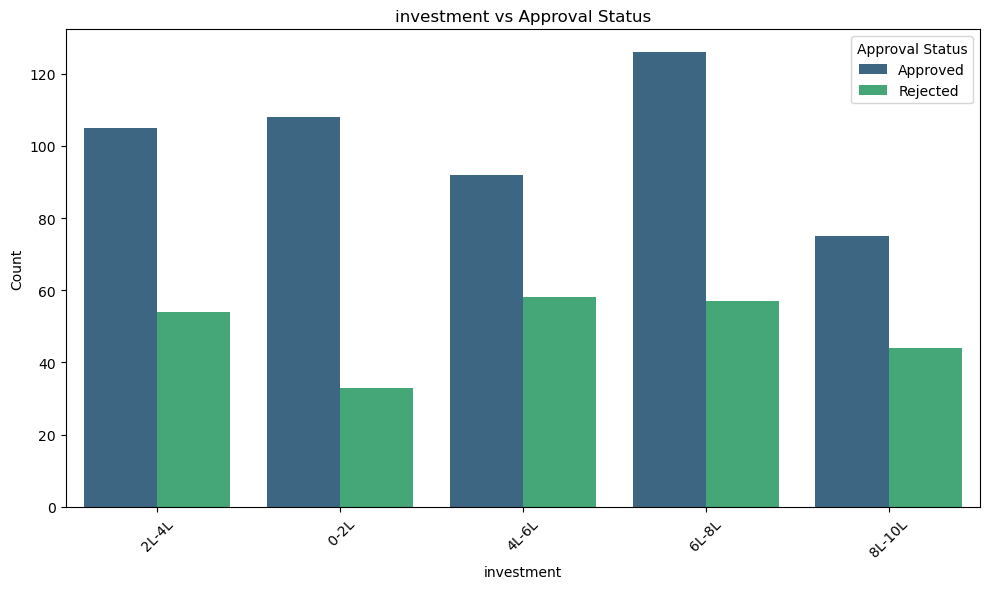

In [23]:
# Step 1: Prepare the Contingency Table
investment_vs_approval = pd.crosstab(df['investment_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(investment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=investment_vs_approval.index, columns=investment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between investment and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between investment and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='investment_bins', hue='approval_status', palette='viridis')
plt.title('investment vs Approval Status')
plt.xlabel('investment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

In [28]:
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['Loan_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between loan amount and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loan_bins', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 0.11623498762550673
P-Value: 0.9435390809197621
Degrees of Freedom: 2

Expected Frequencies Table:
approval_status    Approved   Rejected
Loan_bins                             
 0-1 Cr          172.928191  84.071809
1 Cr-2 Cr        155.433511  75.566489
2 Cr-3 Cr        177.638298  86.361702

Fail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.


Contingency Table: previous_loan_experience vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 2.4239046614957602
P-Value: 0.2976156676463455
Degrees of Freedom: 2

Expected Frequencies Table:
approval_status             Approved    Rejected
previous_loan_experience                        
Negative                   52.484043   25.515957
None                      242.234043  117.765957
Positive                  211.281915  102.718085

Fail to reject the null hypothesis: There is no significant association between Loan Exp amount and Approval Status.


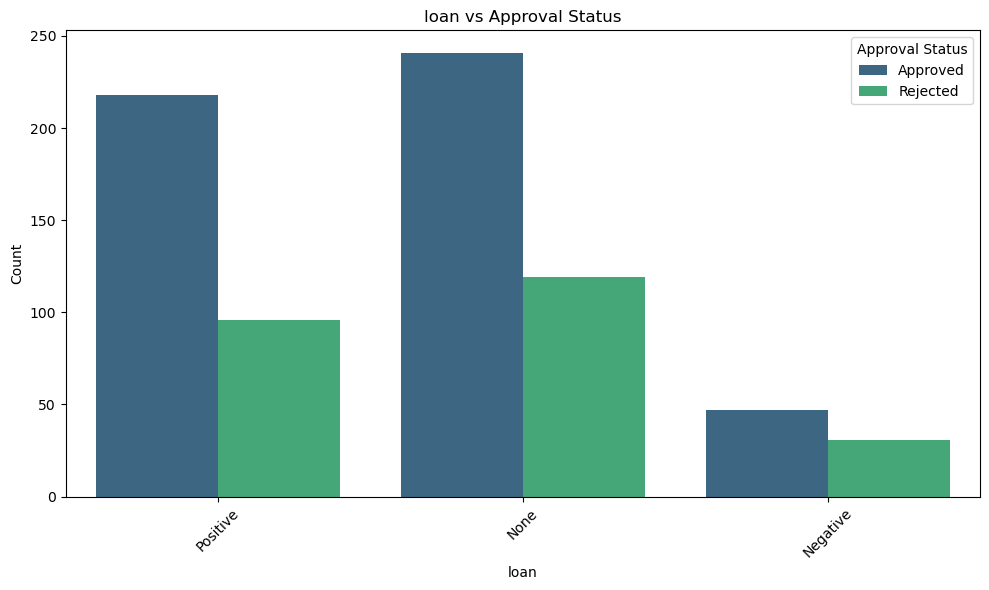

In [29]:

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['previous_loan_experience'], df['approval_status'])

# Display the contingency table
print("Contingency Table: previous_loan_experience vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Loan Exp and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Loan Exp amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='previous_loan_experience', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


In [30]:
#cibil_score

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['cibil_score'], df['approval_status'])

# Display the contingency table
print("Contingency Table: cibil_score vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between cibil_score and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between cibil_score amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cibil_score', hue='approval_status', palette='viridis')
plt.title('cibil_score vs Approval Status')
plt.xlabel('cibil_score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: cibil_score vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 329.8000783710222
P-Value: 0.5850748670286104
Degrees of Freedom: 336

Expected Frequencies Table:
approval_status  Approved  Rejected
cibil_score                        
0                8.747340  4.252660
300              0.672872  0.327128
302              0.672872  0.327128
304              0.672872  0.327128
305              1.345745  0.654255
...                   ...       ...
892              2.018617  0.981383
896              0.672872  0.327128
897              0.672872  0.327128
899              0.672872  0.327128
900              1.345745  0.654255

[337 rows x 2 columns]

Fail to reject the null hypothesis: There is no significant association between cibil_score amount and Approval Status.


Contingency Table: term_bins vs Approval Status
approval_status  Approved  Rejected
DTI_Value                          
DTI<=42%              396       189
DTI>42%               110        57

Chi-Square Test Results:
Chi-Square Statistic: 8.25366059131583
P-Value: 0.08271596044200996
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status    Approved   Rejected
term_bins                             
10-15 years       76.034574  36.965426
15-20 years       84.109043  40.890957
20-25 years       68.632979  33.367021
5-10 years        89.492021  43.507979
>= 25 years      187.731383  91.268617

Fail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.


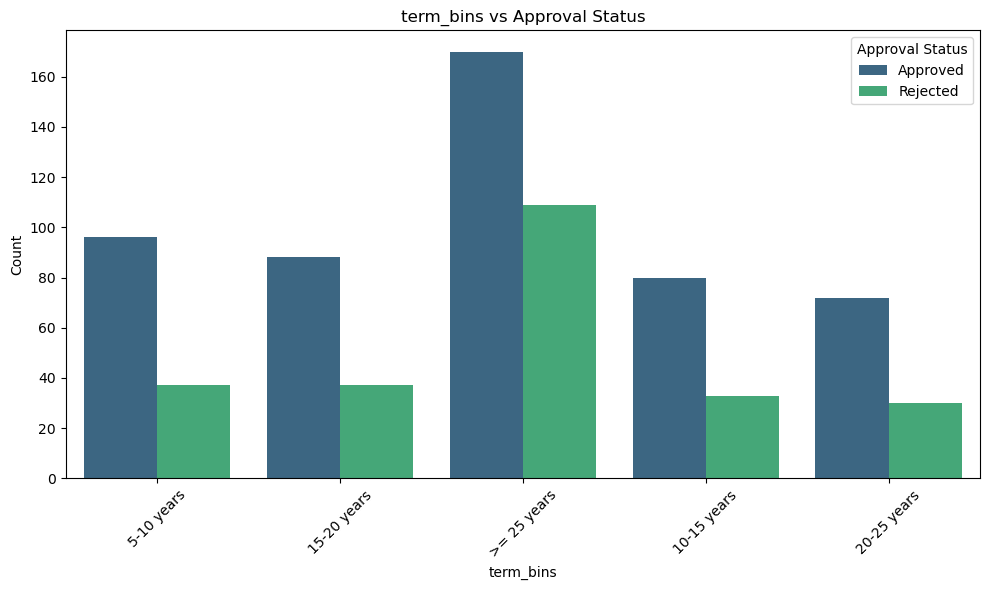

In [31]:

#term_bins

# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['term_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: term_bins vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between term_bins and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='term_bins', hue='approval_status', palette='viridis')
plt.title('term_bins vs Approval Status')
plt.xlabel('term_bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame containing loan information
# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Define a function to conduct a Two-Sample T-Test for a given feature
def conduct_ttest(feature):
    approved_values = approved_df[feature].dropna()  # Drop missing values if any
    rejected_values = rejected_df[feature].dropna()  # Drop missing values if any

    # Perform the Two-Sample T-Test
    t_stat, p_value = ttest_ind(approved_values, rejected_values)

    # Print the results
    print(f"\nTwo-Sample T-Test for {feature}:")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
    
    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between approved and rejected applications.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between approved and rejected applications.")

# Perform T-Tests for each feature
features_to_analyze = ['DTI', 'MonthlySalary', 'investment_portfolio_value','cibil_score']
for feature in features_to_analyze:
    conduct_ttest(feature)



Two-Sample T-Test for DTI:
T-Statistic: -1.6105118593666052
P-Value: 0.10770691705021487
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between approved and rejected applications.

Two-Sample T-Test for MonthlySalary:
T-Statistic: 1.1307171531955231
P-Value: 0.25853560595293346
Fail to reject the null hypothesis: There is no significant difference in the mean MonthlySalary between approved and rejected applications.

Two-Sample T-Test for investment_portfolio_value:
T-Statistic: -1.7692601874710265
P-Value: 0.07725680030312758
Fail to reject the null hypothesis: There is no significant difference in the mean investment_portfolio_value between approved and rejected applications.

Two-Sample T-Test for cibil_score:
T-Statistic: -0.24586734058606244
P-Value: 0.8058521941897228
Fail to reject the null hypothesis: There is no significant difference in the mean cibil_score between approved and rejected applications.


In [38]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming 'df' is your DataFrame containing loan information

# Define a function to conduct One-Way ANOVA for a given numeric feature and categorical group
def conduct_anova(feature, group_by):
    # Group the data by the categorical variable and collect the feature values in each group
    unique_groups = df[group_by].unique()
    groups_data = [df[df[group_by] == group][feature].dropna() for group in unique_groups]

    # Perform One-Way ANOVA
    f_stat, p_value = f_oneway(*groups_data)

    # Print the results
    print(f"\nOne-Way ANOVA for {feature} by {group_by}:")
    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between different {group_by} categories.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between different {group_by} categories.")

# Perform ANOVA for Loan Amount vs. Employment Type
conduct_anova('loan_amount', 'employment_type')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'income_buckets')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'cibil_score')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'previous_loan_experience')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'Savings_bins')





One-Way ANOVA for loan_amount by employment_type:
F-Statistic: 1.6174097634877174
P-Value: 0.18391161679632456
Fail to reject the null hypothesis: There is no significant difference in the mean loan_amount between different employment_type categories.

One-Way ANOVA for DTI by income_buckets:
F-Statistic: 105.58586084637436
P-Value: 5.306954371314764e-57
Reject the null hypothesis: There is a significant difference in the mean DTI between different income_buckets categories.

One-Way ANOVA for DTI by cibil_score:
F-Statistic: 1.0828724546076856
P-Value: 0.2202875849422418
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between different cibil_score categories.

One-Way ANOVA for DTI by previous_loan_experience:
F-Statistic: 0.8192677996410923
P-Value: 0.4411488303759482
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between different previous_loan_experience categories.

One-Way ANOVA for DTI by Savings_bin